<a href="https://colab.research.google.com/github/jc-atharva/Monte-carlo-simulations-for-US-stock-market/blob/main/MONTE_CARLO_SIMULATIONS_FOR_STOCK_PRICE_PREDICTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION -**
Monte Carlo simulations are a method of prediction used to understand the risks and impact that comes with making that decision. It works by putting the given decisional conditions through an enormous number of trials with different random numbers generated from an underlying distribution for the uncertain values.

For monte carlo simulations -

Price today = Price yesterday*e^r 

# How do we predict returns of stocks?
In this project, prediction for returns of stocks is based upon the brownian motion which is a stochastic process for modeling random behavior over time. Brownian motion consists of 2 main characteristics - 


1.  Drift
2.  Volatility 

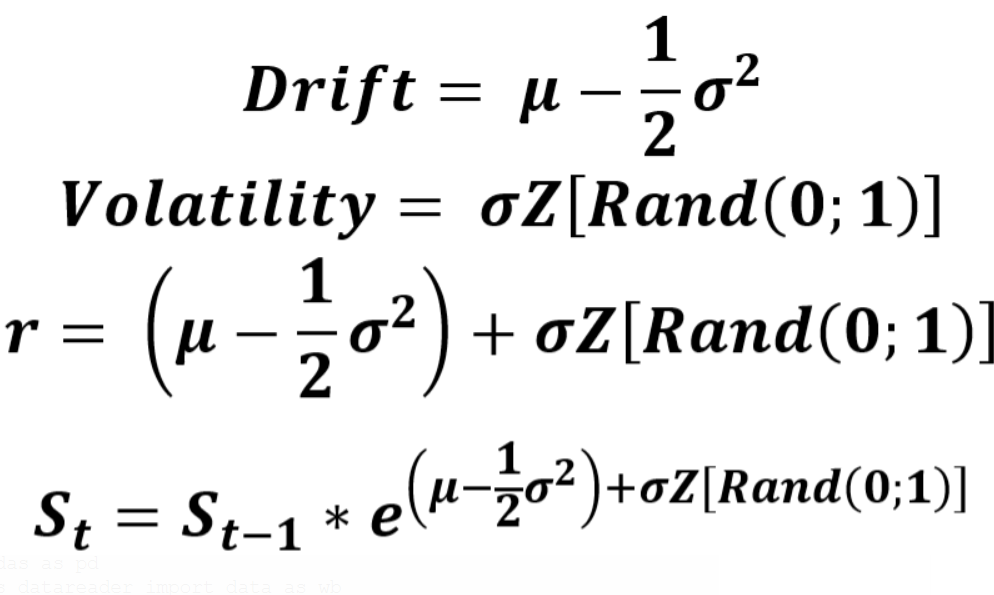

# MONTE CARLO SIMULATION FOR A SINGLE STOCK-

Running a monte carlo simulation for google stock, for analyzing and predicting future stock prices. We use the pandas_datareader library to get data from alpha vantage for the stock.

In [46]:
!pip install yfinance

In [47]:
import os
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf

In [48]:
#getting data via yahoo 
ticker=yf.Ticker('GOOG')
data=pd.DataFrame()
#data[ticker]=wb.DataReader(ticker,data_source='av-daily',start='2010-1-1',api_key='TIJB5A6CYLJYRVYK').close
data[ticker]=ticker.history(start="2010-1-1")['Close']
data.columns
#using daily price series function for alpha vantage, we get the closing price data for google for the last 12 years 

Index([yfinance.Ticker object <GOOG>], dtype='object')

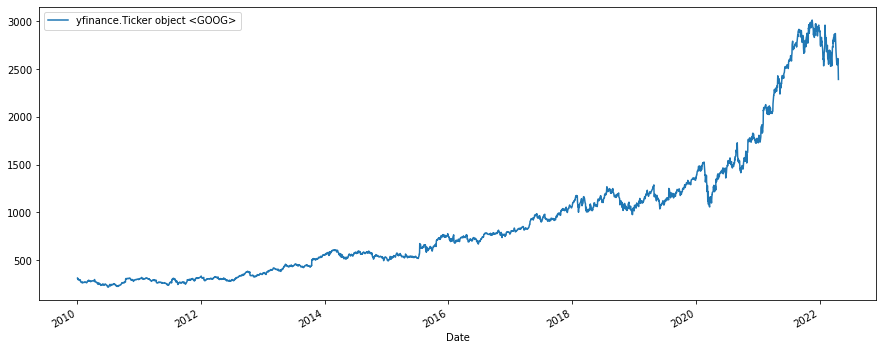

In [49]:
data.plot(figsize=(15,6))

**Computing the logarthmic returns for the stock**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

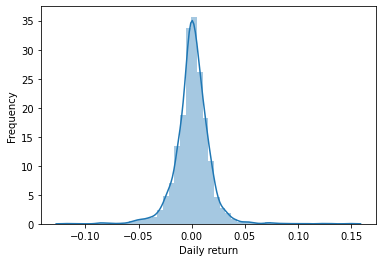

In [50]:
log_return = np.log(1+data.pct_change())
sns.distplot(log_return.iloc[1:])
plt.xlabel("Daily return")
plt.ylabel("Frequency")

**Calculating drift-**

In [51]:
u=log_return.mean()
var=log_return.var()
drift=u-(0.5*var)

drift

yfinance.Ticker object <GOOG>    0.000523
dtype: float64

**Calculating Volatility -**

We generate random variables for every day which we forecast and for every simulation we run.

In [52]:
stdev=log_return.std()
days=50
trials=10000
z=norm.ppf(np.random.rand(days,trials))
return_daily=np.exp(drift.values+stdev.values*z)



In the above code, we have generated 10000 trials for each of the 50 days ahead that we wish to forecast and have calculated the daily return based on the formula stated at the beginning 

**Calculating stock price for every trial**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([[2392.2800293 , 2392.2800293 , 2392.2800293 , ..., 2392.2800293 ,
        2392.2800293 , 2392.2800293 ],
       [2446.57044634, 2380.23978223, 2433.96269923, ..., 2356.93499   ,
        2354.31232131, 2364.20624662],
       [2465.24819374, 2355.07385219, 2502.21028939, ..., 2387.14334564,
        2314.82123977, 2315.83337606],
       ...,
       [2139.04235184, 2415.49771388, 2258.86252378, ..., 2271.57034582,
        2255.96541212, 2249.80413149],
       [2134.94473205, 2438.9191622 , 2286.86980859, ..., 2285.4740031 ,
        2239.36565282, 2241.57659921],
       [2112.44764681, 2419.25135467, 2253.99389619, ..., 2303.83860472,
        2236.90315555, 2206.67018018]])

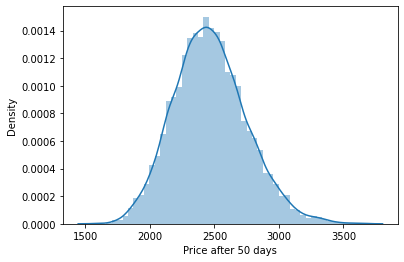

In [53]:
price_path=np.zeros_like(return_daily)
price_path[0]=data.iloc[-1]
for t in range(1,days):
  price_path[t]=price_path[t-1]*return_daily[t]

sns.distplot(price_path[-1])
plt.xlabel("Price after 50 days")
price_path

# **Expanding single stock simulation to automation for any stock-**

Now that the simulation has predicted results for a single stock for the given time frame, we look towards automating the entire simulation command for any number of stocks that we wish for, after which we can implement Capital Asset Pricing Model (CAPM) metrics to calculate different important ratios for any stock.

In [54]:
def import_stock_data(tickers, start='2010-1-1'):
  data=pd.DataFrame()
  if len(tickers)==1:
     ticker=yf.Ticker(tickers[0])
     data[ticker]=ticker.history(start="2010-1-1")['Close']
     data=pd.DataFrame(data)
  else:
    for t in tickers:
        #data[t]=wb.DataReader(t,data_source='av-daily',start=start,api_key='TIJB5A6CYLJYRVYK').close
        ticker=yf.Ticker(t)
        data[ticker]=ticker.history(start="2010-1-1")['Close']
        data=pd.DataFrame(data)
  return(data)


  #example use
bigdata=import_stock_data(['FB','GOOG','AAPL'],start='2005-1-1')
bigdata.tail()

,yfinance.Ticker object <FB>,yfinance.Ticker object <GOOG>,yfinance.Ticker object <AAPL>
Date,,,
2022-04-18,210.770004,2559.219971,165.070007
2022-04-19,217.309998,2610.620117,167.399994
2022-04-20,200.419998,2564.909912,167.229996
2022-04-21,188.070007,2498.750000,166.419998
2022-04-22,184.110001,2392.280029,161.789993


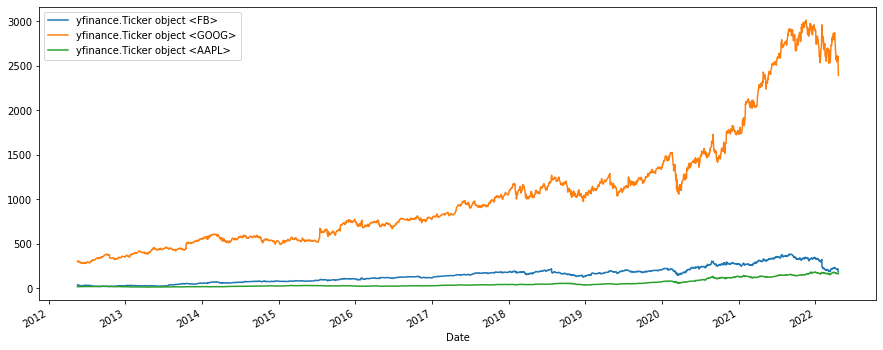

In [55]:
bigdata.plot(figsize=(15,6))

**Computing Logarithmic returns-**

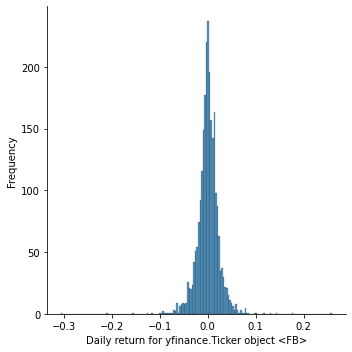

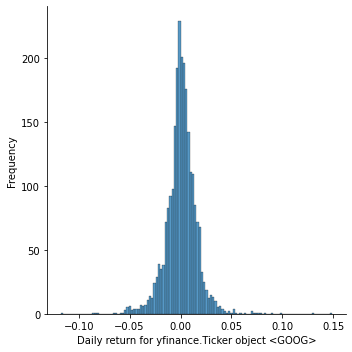

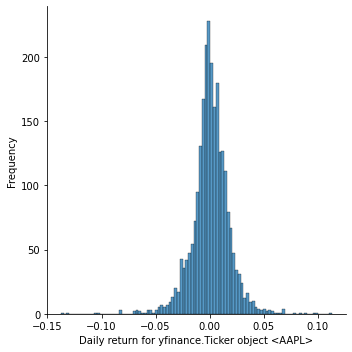

In [56]:
def log_returns(data):
  return (np.log(1+data.pct_change()))

log_return = log_returns(bigdata)
for t in log_return:
  sns.displot(log_return[t].iloc[1:])
  plt.xlabel("Daily return for %s"%(t))
  plt.ylabel("Frequency")


**Drift calculation-**

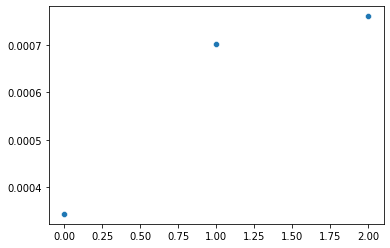

In [57]:
def drift_calc(data):
  lr=log_returns(data)
  u=lr.mean()
  var=lr.var()
  drift=u-(0.5*var)
  try:
    return drift.values
  except:
    return drift

bigdrift=drift_calc(bigdata)
sns.scatterplot(data=bigdrift)

**Daily returns calculation-**

Text(0.5, 6.79999999999999, '50th day return')

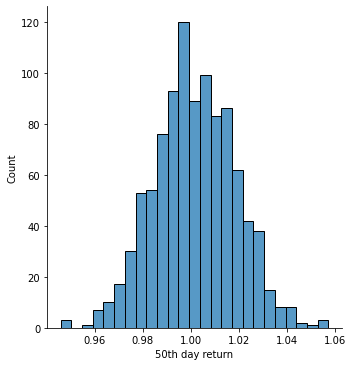

In [65]:
def daily_return(data,days,iteration):
  ft=drift_calc(data)
  try:
        stv = log_returns(data).std().values
  except:
        stv = log_returns(data).std()
  return np.exp(ft+stv*norm.ppf(np.random.rand(days,iteration)))

sns.displot(daily_return(data,50,1000)[-1])
plt.xlabel("50th day return")

# returns_daily=daily_return(bigdata,50,3)
# returns_daily=pd.DataFrame(returns_daily)
# for column in returns_daily:
#   stock_return=sns.displot(returns_daily[column])
#   plt.xlabel("50 day returns for %s"%(column))
# stock_return._legend.set_title('Stock returns')
# new_title=['FB','GOOG','AAPL']
# for t,l in zip(stock_return._legend.texts,new_title):
#   t.set_text(l)

In [84]:
def pricepath(data,days,iterations):
  returns = daily_return(data,days,iterations)
  price_list=np.zeros_like(returns)
  price_list[0]=data.iloc[-1]
  for t in range(1,days):
    price_list[t]=price_list[t-1]*returns[t]
  return price_list

prices=pricepath(bigdata,50,3)
prices

array([[ 184.11000061, 2392.2800293 ,  161.78999329],
       [ 185.70446618, 2387.8238654 ,  163.54522958],
       [ 188.11397566, 2413.82088221,  164.57162468],
       [ 188.91194726, 2464.63196017,  160.32940108],
       [ 196.13561421, 2480.85544628,  156.75814643],
       [ 190.73877352, 2475.61591525,  161.70143171],
       [ 185.89377019, 2482.70920953,  163.62969293],
       [ 185.90980481, 2529.92182268,  161.17035571],
       [ 183.75898682, 2478.19660589,  161.81928004],
       [ 182.87344327, 2428.03466388,  160.59429676],
       [ 191.44425661, 2411.25216414,  160.66647518],
       [ 193.75853628, 2436.43776648,  160.9627619 ],
       [ 197.0700353 , 2486.19246908,  160.38363858],
       [ 194.22594626, 2500.74701081,  157.38408395],
       [ 188.37508555, 2486.10662333,  156.88193592],
       [ 187.12090365, 2455.51857399,  155.84143235],
       [ 182.07197044, 2439.5890609 ,  153.7377036 ],
       [ 183.75026451, 2511.13082055,  156.51970893],
       [ 177.93360116, 2519.

# **CAPM METRICS CALCULATION-**


Before we jump into Monte Carlo Simulations, we would like to report some statistics with it, including the Beta and Sharpe Ratio of the stock, compared to the market portfolio. To understand these metrics, we first must understand the underlying concepts of the Capital Asset Pricing Model, starting with the market portfolio.

The market portfolio is the theoretical combination of all possible investments in the world. However, there is no such thing as a market portfolio. We approximate it with a stock market index. In our case, we use the S&P500, but you can specify any index you want to!

We also note that there is no such thing as a risk-free asset. We will use a 10-year US government bond yield of 2.5% instead.

The equity premium is the difference between the expected return of the market and the risk-free asset. This value is typically between 4.5 and 5.5%. We can use 5%.

We use the market portfolio to compute the Beta, the CAPM expected return, and the Sharpe Ratio of a stock.

Beta: measures the market risk that cannot be avoided through diversification. This is the relationship between the stock and the market portfolio. In other words, it is a measure of how much risk the investment will add to a portfolio that looks like the market. #####
 

 When beta = 0, it means that there's no relationship.

 When beta < 1, it means that the stock is defensive (less prone to high highs and low lows)

 When beta > 1, it means that the stock is aggresive (more prone to high highs and low lows)
Expected Return CAPM: calculates the expected return of a security adjusted to the risk taken. This equates to the return expected from taking the extra risk of purchasing this security. #####
 
 

Sharpe Ratio: measures the performance of a security compared to a risk-free asset, after adjusting for its risk. This is the excess return per unit of risk of an investment. #####
 
 

 When Sharpe > 1, GOOD risk-adjusted returns

 When Sharpe > 2, VERY GOOD risk-adjusted returns

 When Sharpe > 3, EXCELLENT risk-adjusted returns

In [85]:
def market_data_combo(data,mark_ticker='^GSPC',start='2010-1-1'):
  #market_data=import_stock_data(mark_ticker,start)
  ticker=yf.Ticker(mark_ticker)
  market_data=pd.DataFrame()
  #data[ticker]=wb.DataReader(ticker,data_source='av-daily',start='2010-1-1',api_key='TIJB5A6CYLJYRVYK').close
  market_data[ticker]=ticker.history(start="2010-1-1")['Close']
  market_data=pd.DataFrame(market_data)
  market_returns=log_returns(market_data).dropna()
  annual_return=np.exp(market_returns.mean()*252).values-1
  data=data.merge(market_data,left_index=True,right_index=True)
  return data,annual_return


market_data,annual_return=market_data_combo(bigdata,mark_ticker='^GSPC',start='2010-1-1')
market_data.head()

,yfinance.Ticker object <FB>,yfinance.Ticker object <GOOG>,yfinance.Ticker object <AAPL>,yfinance.Ticker object <^GSPC>
Date,,,,
2012-05-18,38.230000,299.078979,16.219671,1295.219971
2012-05-21,34.029999,305.908386,17.164623,1315.989990
2012-05-22,31.000000,299.278229,17.032820,1316.630005
2012-05-23,32.000000,303.592072,17.448421,1318.859985
2012-05-24,33.029999,300.702881,17.288176,1320.680054


In [86]:
def beta_sharpe(data, mark_ticker='^GSPC',start='2010-1-1',riskfree=0.025):
  #Beta
  dd,mark_ret=market_data_combo(data,mark_ticker,start)
  log_ret=log_returns(dd)
  covar=log_ret.cov()*252
  covar=pd.DataFrame(covar.iloc[:-1,-1])
  mrk_var=log_ret.iloc[:,-1].var()*252
  beta=covar/mrk_var
  stdev_ret=pd.DataFrame(((log_ret.std()*250**0.5)[:-1]), columns=['STD'])
  beta = beta.merge(stdev_ret, left_index=True, right_index=True)
  #CAPM
  for i,row in beta.iterrows():
    beta.at[i,'CAPM']=riskfree+(row[0]*(mark_ret-riskfree))
  #Sharpe
  for i,row in beta.iterrows():
    beta.at[i,'Sharpe']=((row['CAPM']-riskfree)/row['STD'])
  return beta

beta_sharpe(bigdata)

,yfinance.Ticker object <^GSPC>,STD,CAPM,Sharpe
yfinance.Ticker object <FB>,1.134427,0.378379,0.126006,0.266945
yfinance.Ticker object <GOOG>,1.081168,0.253867,0.121264,0.379191
yfinance.Ticker object <AAPL>,1.144515,0.282465,0.126905,0.360768


In [87]:
def prob_find(predicted,higherthan,on='value'):
    if on=='return':
      predicted0=predicted.iloc[0,0]
      predicted=predicted.iloc[-1]
      predList=list(predicted)
      over=[(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0>=higherthan]
      less=[(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0<higherthan]
    elif on=='value':
      predicted=predicted[t].iloc[-1]
      predList=list(predicted)
      over=[i for i in predList if i>=higherthan]
      less=[i for i in predList if i<higherthan]
    else:
      print("'on' must be value or return")
    return (len(over)/(len(over)+len(less)))

# **RUNNING THE SIMULATION FOR A SINGLE STOCK-**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


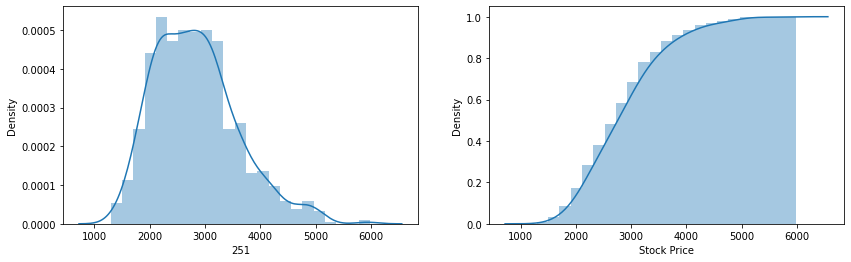

yfinance.Ticker object <GOOG>
Days:251
Expected value:$2835.25
Return: 15.62%
Probability of Breakeven: 0.675


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,...,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029,2392.280029
1,2392.825720,2443.979691,2408.907671,2413.448353,2393.123830,2462.588475,2365.687433,2422.155362,2397.743819,2375.235560,...,2466.951194,2478.820498,2405.172419,2414.721506,2381.239763,2356.518348,2384.152552,2424.247621,2417.671505,2373.962204
2,2423.976615,2433.444158,2426.752102,2377.238205,2443.095125,2494.177899,2459.256083,2469.077872,2364.028633,2364.521187,...,2416.836616,2454.708693,2418.668291,2425.081794,2429.190454,2396.703930,2413.703919,2403.943965,2490.183279,2300.916009
3,2374.131088,2424.749103,2461.138290,2375.337887,2476.247072,2480.083788,2392.977777,2453.955423,2382.011348,2347.750600,...,2503.843594,2413.219423,2434.960524,2466.875289,2447.674598,2416.901445,2423.425203,2415.970482,2466.045251,2256.485633
4,2352.091487,2321.380470,2452.442380,2320.866554,2496.570333,2472.739756,2355.450633,2461.736952,2414.917234,2363.874714,...,2466.446168,2366.798926,2449.284704,2532.449173,2413.762802,2455.233778,2464.695872,2361.661944,2513.875610,2300.857098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2705.475417,2719.702831,3693.324373,2915.834218,2392.271383,1950.635793,2055.686061,2831.075366,3110.781750,2252.505106,...,2221.323843,4637.973856,2259.087336,3207.262751,3573.215491,1927.310141,2623.318953,4497.755798,2847.039361,2777.681962
248,2686.222764,2731.802144,3664.026184,2943.505414,2368.874295,1925.109829,2102.840016,2825.192205,3104.358817,2230.917174,...,2211.846750,4744.877463,2228.605129,3201.672834,3533.367515,1954.152600,2623.186923,4517.255870,2860.772618,2715.804687
249,2647.749860,2707.640293,3577.234288,2961.514433,2371.698253,1922.195407,2020.439218,2790.350416,3120.220584,2237.024901,...,2241.475138,4788.534116,2226.441978,3268.730090,3571.375775,1945.572563,2602.723416,4469.370569,2913.152004,2653.842326
250,2705.830234,2661.085488,3484.633058,2851.929634,2410.918509,1924.570520,2007.030827,2836.908720,3037.526305,2292.944461,...,2290.707458,4662.212779,2210.885896,3253.371963,3525.738423,1991.297909,2559.572132,4514.984960,2982.143158,2680.447402


In [88]:
def simulate_mc(data,days,iterations,plot=True):
  returns=daily_return(data,days,iterations)
  price_list=np.zeros_like(returns)
  price_list[0]=data.iloc[-1]
  for t in range(1,days):
    price_list[t]=price_list[t-1]*returns[t]
  if (plot==True):
    x=pd.DataFrame(price_list).iloc[-1]
    fig,ax=plt.subplots(1,2,figsize=(14,4))
    sns.distplot(x,ax=ax[0])
    sns.distplot(x,hist_kws={'cumulative':True},kde_kws={'cumulative':True},ax=ax[1])
    plt.xlabel("Stock Price")
    plt.show()
  try:
    [print(nam) for nam in data.columns]
  except:
    print(data.name)
  print(f"Days:{days-1}")
  print(f"Expected value:${round(pd.DataFrame(price_list).iloc[-1].mean(),2)}")
  print(f"Return: {round(100*(pd.DataFrame(price_list).iloc[-1].mean()-price_list[0,1])/pd.DataFrame(price_list).iloc[-1].mean(),2)}%")
  print(f"Probability of Breakeven: {prob_find(pd.DataFrame(price_list),0,on='return')}")
  return pd.DataFrame(price_list)

simulate_mc(data,252,1000)

# **Multi-stock simulation for monte carlo method-**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


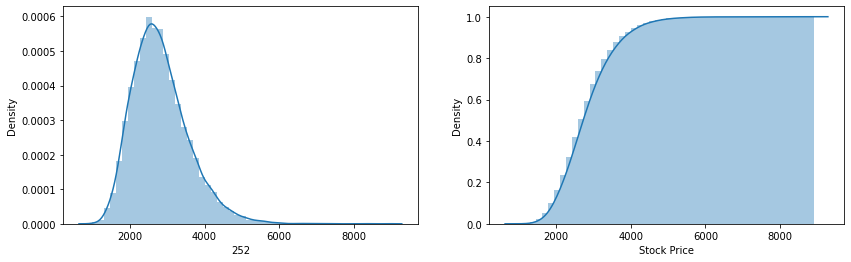

yfinance.Ticker object <GOOG>
Days:252
Expected value:$2823.81
Return: 15.28%
Probability of Breakeven: 0.6955
Beta:                                yfinance.Ticker object <^GSPC>   STD  CAPM  \
yfinance.Ticker object <GOOG>                            1.04  0.26  0.12   
yfinance.Ticker object <FB>                              1.06  0.38  0.12   
yfinance.Ticker object <AAPL>                            1.08  0.28  0.12   
yfinance.Ticker object <TSLA>                            1.32  0.56  0.14   

                               Sharpe  
yfinance.Ticker object <GOOG>    0.36  
yfinance.Ticker object <FB>      0.25  
yfinance.Ticker object <AAPL>    0.34  
yfinance.Ticker object <TSLA>    0.21  
Sharpe: 0.36
CAPM Return: 11.77%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


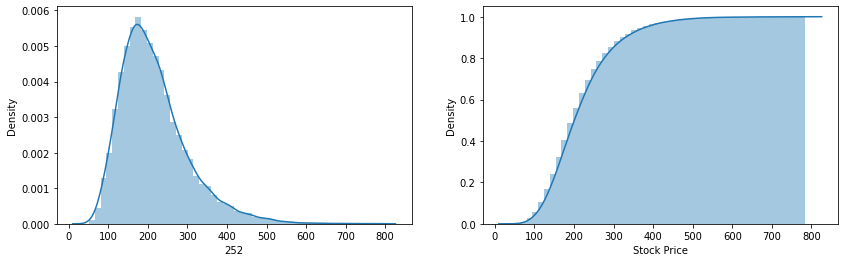

yfinance.Ticker object <FB>
Days:252
Expected value:$216.04
Return: 14.78%
Probability of Breakeven: 0.5885
Beta:                                yfinance.Ticker object <^GSPC>   STD  CAPM  \
yfinance.Ticker object <GOOG>                            1.04  0.26  0.12   
yfinance.Ticker object <FB>                              1.06  0.38  0.12   
yfinance.Ticker object <AAPL>                            1.08  0.28  0.12   
yfinance.Ticker object <TSLA>                            1.32  0.56  0.14   

                               Sharpe  
yfinance.Ticker object <GOOG>    0.36  
yfinance.Ticker object <FB>      0.25  
yfinance.Ticker object <AAPL>    0.34  
yfinance.Ticker object <TSLA>    0.21  
Sharpe: 0.25
CAPM Return: 11.92%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


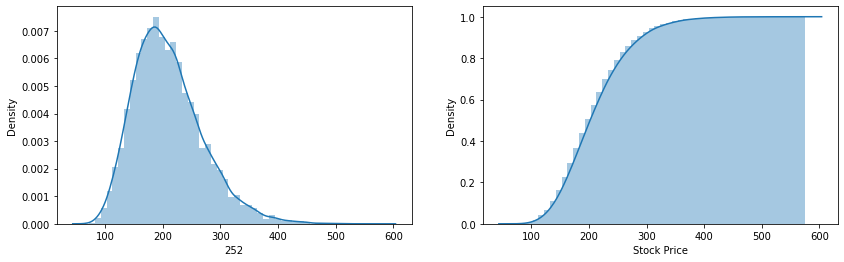

yfinance.Ticker object <AAPL>
Days:252
Expected value:$209.54
Return: 22.79%
Probability of Breakeven: 0.7795
Beta:                                yfinance.Ticker object <^GSPC>   STD  CAPM  \
yfinance.Ticker object <GOOG>                            1.04  0.26  0.12   
yfinance.Ticker object <FB>                              1.06  0.38  0.12   
yfinance.Ticker object <AAPL>                            1.08  0.28  0.12   
yfinance.Ticker object <TSLA>                            1.32  0.56  0.14   

                               Sharpe  
yfinance.Ticker object <GOOG>    0.36  
yfinance.Ticker object <FB>      0.25  
yfinance.Ticker object <AAPL>    0.34  
yfinance.Ticker object <TSLA>    0.21  
Sharpe: 0.34
CAPM Return: 12.14%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


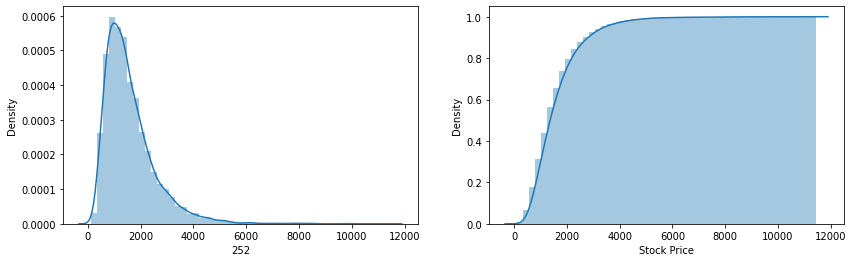

yfinance.Ticker object <TSLA>
Days:252
Expected value:$1586.16
Return: 36.64%
Probability of Breakeven: 0.7001
Beta:                                yfinance.Ticker object <^GSPC>   STD  CAPM  \
yfinance.Ticker object <GOOG>                            1.04  0.26  0.12   
yfinance.Ticker object <FB>                              1.06  0.38  0.12   
yfinance.Ticker object <AAPL>                            1.08  0.28  0.12   
yfinance.Ticker object <TSLA>                            1.32  0.56  0.14   

                               Sharpe  
yfinance.Ticker object <GOOG>    0.36  
yfinance.Ticker object <FB>      0.25  
yfinance.Ticker object <AAPL>    0.34  
yfinance.Ticker object <TSLA>    0.21  
Sharpe: 0.21
CAPM Return: 14.21%


In [64]:
def monte_carlo(tickers,days,iterations,start_date='2010-1-1',plotten=False):
  data=import_stock_data(tickers,start=start_date)
  # data.tail()
  inform=beta_sharpe(data,mark_ticker='^GSPC',start=start_date)
  simulateddf=[]
  for t in range(len(tickers)):
        y = simulate_mc(data.iloc[:,t], (days+1), iterations)
        if plotten == True:
            forplot = y.iloc[:,0:10]
            forplot.plot(figsize=(15,4))
        print(f"Beta: {round(inform,2)}")
        print(f"Sharpe: {round(inform.iloc[t,inform.columns.get_loc('Sharpe')],2)}") 
        print(f"CAPM Return: {round(100*inform.iloc[t,inform.columns.get_loc('CAPM')],2)}%")
        y['ticker'] = tickers[t]
        cols = y.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        y = y[cols]
        simulateddf.append(y)
  simulateddf=pd.concat(simulateddf)
  return simulateddf

ret_sim_df = monte_carlo(['GOOG','FB','AAPL','TSLA'], 252, 10000,  start_date='2015-1-1')